<p style="font-size:50px"> Santander Customer Transaction Prediction </p>

<img src="img/santander.png">

<p style="font-size:20px">This notebook aims to solve a business problem proposed by Santander through the Kaggle platform. Data and other information about the competition can be found at the <a href=https://www.kaggle.com/c/santander-customer-transaction-prediction/overview>link</a>.</p>

DESCRIPTION:

At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

# EDA

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Declaring Custom Functions

In [2]:
def EDA (df):
    df= df.rename(columns=str.lower)

    eda_df = {}
    eda_df['Non-null_Count'] = df.count()
    eda_df['Null_Count'] = df.isnull().sum()
    eda_df['Null(%)'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    
    
    colunas = sorted(df.columns.str.lower().tolist())#, reverse=False)
    
    eda_df['Mean'] = np.round(df.mean(), 6)
    eda_df['STD'] = np.round(df.std(), 6)
    
    eda_df['Min'] = np.round(df.min(), 4)
    eda_df['25%'] = np.round(df.quantile(q=0.25), 6)  
    eda_df['50%'] = np.round(df.median(), 6)
    eda_df['75%'] = np.round(df.quantile(q=0.75), 6)  
    eda_df['Max'] = np.round(df.max(), 4)    
       
    eda = pd.DataFrame(eda_df)
    
    eda['Unique_Values_(Amt)'] = list(map(lambda x: len(df[x].unique()), colunas))
    eda['Unique_Values(%)'] = np.round(eda['Unique_Values_(Amt)']/eda['Non-null_Count'], 6)

    return eda

## Importing Data

In [3]:
%%time
df = pd.read_csv('data/train.csv')

Wall time: 9.07 s


In [4]:
df.head(20)

ID_code  target    var_0   var_1    var_2   var_3    var_4    var_5  \
0    train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834   
1    train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433   
2    train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837   
3    train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361   
4    train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486   
5    train_5       0  11.4763 -2.3182  12.6080  8.6264  10.9621   3.5609   
6    train_6       0  11.8091 -0.0832   9.3494  4.2916  11.1355  -8.0198   
7    train_7       0  13.5580 -7.9881  13.8776  7.5985   8.6543   0.8310   
8    train_8       0  16.1071  2.4426  13.9307  5.6327   8.8014   6.1630   
9    train_9       0  12.5088  1.9743   8.8960  5.4508  13.6043 -16.2859   
10  train_10       0   5.0702 -0.5447   9.5900  4.2987  12.3910 -18.8687   
11  train_11       0  12.7188 -7.9750  10.3757  9.0101  12.8570 -12.0852   
12  train_12       0   8.7671 -4.6154   9.7242  7.4242   9.0254   1.4247   
13  train_13       1  16.3699  1.5934  16.7395  7.3330  12.1450   5.9004   
14  train_14       0  13.8080  5.0514  17.2611  8.5120  12.8517  -9.1622   
15  train_15       0   3.9416  2.6562  13.3633  6.8895  12.2806 -16.1620   
16  train_16       0   5.0615  0.2689  15.1325  3.6587  13.5276  -6.5477   
17  train_17       0   8.4199 -1.8128   8.1202  5.3955   9.7184 -17.8390   
18  train_18       0   4.8750  1.2646  11.9190  8.4650  10.7203  -0.6707   
19  train_19       0   4.4090 -0.7863  15.1828  8.0631  11.2831  -0.7356   

     var_6    var_7  ...  var_190  var_191  var_192  var_193  var_194  \
0   5.1187  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227   
1   5.6208  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   
2   6.9427  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   
3   5.8428  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347   
4   5.9405  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876   
5   4.5322  15.2255  ...  -6.3068   6.6025   5.2912   0.4403  14.9452   
6   6.1961  12.0771  ...   8.7830   6.4521   3.5325   0.1777  18.3314   
7   5.6890  22.3262  ...  13.1700   6.5491   3.9906   5.8061  23.1407   
8   4.4514  10.1854  ...   1.4298  14.7510   1.6395   1.4181  14.8370   
9   6.0637  16.8410  ...   0.5543   6.3160   1.0371   3.6885  14.8344   
10  6.0382  14.3797  ...   7.2780   8.0819   0.2139  -0.0761  14.9585   
11  5.6464  11.8370  ...  -0.8901   2.6559  -0.0503   5.5946  13.6152   
12  6.2815  12.3143  ...   0.3782   7.4382   0.0854   1.3444  17.2439   
13  4.8222  20.9729  ...   7.4002   7.4031   4.3989   4.0978  17.3638   
14  5.7327  21.0517  ...   1.0740   8.3220   3.2619   1.6738  17.4797   
15  5.6979  14.4573  ...  -3.4195   0.8829  -1.9859   3.9905  22.4647   
16  5.2757   9.8710  ...   0.2717   7.2854   0.5670   8.1822  19.5616   
17  4.0959  15.2860  ...   7.4363  11.3072   3.7903   0.0290  16.2954   
18  5.6103  16.4661  ...   9.1843   2.6812   1.8587   4.6929  16.0916   
19  6.3801  16.0218  ...   5.9745   6.3267   2.5156   8.9878  16.0550   

    var_195  var_196  var_197  var_198  var_199  
0   -2.3978   7.8784   8.5635  12.7803  -1.0914  
1    2.0339   8.1267   8.7889  18.3560   1.9518  
2    3.1417  -6.5213   8.2675  14.7222   0.3965  
3   -1.2706  -2.9275  10.2922  17.9697  -8.9996  
4   -1.5121   3.9267   9.5031  17.9974  -8.8104  
5    1.0314  -3.6241   9.7670  12.5809  -4.7602  
6    0.5845   9.1104   9.1143  10.8869  -3.2097  
7   -0.3776   4.2178   9.4237   8.6624   3.4806  
8   -1.9940  -1.0733   8.1975  19.5114   4.8453  
9    0.4467  14.1287   7.9133  16.2375  14.2514  
10  -1.2160   6.6576   9.2553  14.2914  -7.6652  
11   2.4058  -1.7183   9.6745  16.7498  -3.9728  
12  -0.0798   5.7389   8.4897  17.0938   4.6106  
13  -1.3022   9.6846   9.0419  15.6064 -10.8529  
14  -0.0257  -3.5323   9.3439  24.4479  -5.1110  
15   0.5129   6.5273   8.2899  12.9116  -4.9182  
16   0.4365  -3.4975   8

In [5]:
df.drop("ID_code", axis=1, inplace=True)
df.head(5)

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

    var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3 -5.8609  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  6.2654  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 201 columns]

## Initial Data Analysis

In [6]:
%%capture --no-display
df_EDA = EDA(df)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_EDA)

Non-null_Count  Null_Count  Null(%)    DType       Mean        STD  \
target           200000           0      0.0    int64   0.100490   0.300653   
var_0            200000           0      0.0  float64  10.679914   3.040051   
var_1            200000           0      0.0  float64  -1.627622   4.050044   
var_2            200000           0      0.0  float64  10.715192   2.640894   
var_3            200000           0      0.0  float64   6.796529   2.043319   
var_4            200000           0      0.0  float64  11.078333   1.623150   
var_5            200000           0      0.0  float64  -5.065317   7.863267   
var_6            200000           0      0.0  float64   5.408949   0.866607   
var_7            200000           0      0.0  float64  16.545850   3.418076   
var_8            200000           0      0.0  float64   0.284162   3.332634   
var_9            200000           0      0.0  float64   7.567236   1.235070   
var_10           200000           0      0.0  float64   0.394340   5.500793   
var_11           200000           0      0.0  float64  -3.245596   5.970253   
var_12           200000           0      0.0  float64  14.023978   0.190059   
var_13           200000           0      0.0  float64   8.530232   4.639536   
var_14           200000           0      0.0  float64   7.537606   2.247908   
var_15           200000           0      0.0  float64  14.573126   0.411711   
var_16           200000           0      0.0  float64   9.333264   2.557421   
var_17           200000           0      0.0  float64  -5.696731   6.712612   
var_18           200000           0      0.0  float64  15.244013   7.851370   
var_19           200000           0      0.0  float64  12.438567   7.996694   
var_20           200000           0      0.0  float64  13.290894   5.876254   
var_21           200000           0      0.0  float64  17.257883   8.196564   
var_22           200000           0      0.0  float64   4.305430   2.847958   
var_23           200000           0      0.0  float64   3.019540   0.526893   
var_24           200000           0      0.0  float64  10.584400   3.777245   
var_25           200000           0      0.0  float64  13.667496   0.285535   
var_26           200000           0      0.0  float64  -4.055133   5.922210   
var_27           200000           0      0.0  float64  -1.137908   1.523714   
var_28           200000           0      0.0  float64   5.532980   0.783367   
var_29           200000           0      0.0  float64   5.053874   2.615942   
var_30           200000           0      0.0  float64  -7.687740   7.965198   
var_31           200000           0      0.0  float64  10.393046   2.159891   
var_32           200000           0      0.0  float64  -0.512886   2.587830   
var_33           200000           0      0.0  float64  14.774147   4.322325   
var_34           200000           0      0.0  float64  11.434250   0.541614   
var_35           200000           0      0.0  float64   3.842499   5.179559   
var_36           200000           0      0.0  float64   2.187230   3.119978   
var_37           200000           0      0.0  float64   5.868899   2.249730   
var_38           200000           0      0.0  float64  10.642131   4.278903   
var_39           200000           0      0.0  float64   0.662956   4.068845   
var_40           200000           0      0.0  float64  -6.725505   8.279259   
var_41           200000           0      0.0  float64   9.299858   5.938088   
var_42           200000           0      0.0  float64  11.222356   0.695991   
var_43           200000           0      0.0  float64  11.569954   0.309599   
var_44           200000           0      0.0  float64   8.948289   5.903073   
var_45           200000           0      0.0  float64 -12.699667  21.404912   
var_46           200000           0      0.0  float64  11.326488   2.860511   
var_47           200000           0      0.0  float64 -12.471737  10.579862   
var_48           200000           0      0.0  float64  14.7

<ul style="font-size:20px;">
  <li>The mean of the target variable indicates a ratio of approximately 1/10 between the values of the variable (0 and 1). <span style="color:red">It may be necessary to use some technique to smooth the data imbalance.</span></li>
  <li>No missing data: df_EDA['Non-null_Count'].mean() = 200000</li>
  <li>The variable target is categorical (only 2 unique values).</li>
  <li>The type of all data is numeric [ df_EDA['DType'].value_counts() ], although it is necessary to verify the existence of other categorical variables such as target.</li>
  <li>It is difficult to see the distribution of data because of the number of variables. Plotting some variables statistical properties can help.</li>
</ul>

### Search for categorical variables

<p style="font-size:15px;">Proportion of unique values of variables in ascending order:</p>

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_EDA.iloc[:,-2:].sort_values(by = 'Unique_Values(%)'))

Unique_Values_(Amt)  Unique_Values(%)
target                     2          0.000010
var_165                  451          0.002255
var_191                 7962          0.039810
var_11                  8525          0.042625
var_6                   9376          0.046880
var_24                  9561          0.047805
var_55                 10608          0.053040
var_70                 11071          0.055355
var_169                13527          0.067635
var_118                14853          0.074265
var_138                15188          0.075940
var_30                 16059          0.080295
var_75                 17902          0.089510
var_78                 18242          0.091210
var_39                 19236          0.096180
var_57                 19810          0.099050
var_37                 21464          0.107320
var_116                24913          0.124565
var_128                25164          0.125820
var_193                26708          0.133540
var_195                29387          0.146935
var_137                31592          0.157960
var_146                32308          0.161540
var_31                 32411          0.162055
var_198                33266          0.166330
var_149                33460          0.167300
var_153                35545          0.177725
var_121                35859          0.179295
var_36                 36638          0.183190
var_155                37744          0.188720
var_156                38599          0.192995
var_8                  39115          0.195575
var_109                40537          0.202685
var_51                 40595          0.202975
var_64                 40634          0.203170
var_100                41764          0.208820
var_18                 43084          0.215420
var_15                 46464          0.232320
var_163                47722          0.238610
var_189                49417          0.247085
var_177                53212          0.266060
var_92                 56164          0.280820
var_71                 57396          0.286980
var_107                57870          0.289350
var_38                 57923          0.289615
var_104                59065          0.295325
var_161                59379          0.296895
var_120                60185          0.300925
var_16                 60482          0.302410
var_20                 63467          0.317335
var_134                63515          0.317575
var_26                 64695          0.323475
var_199                69300          0.346500
var_9                  71065          0.355325
var_176                72254          0.361270
var_7                  72627          0.363135
var_61                 73728          0.368640
var_123                74597          0.372985
var_159                74777          0.373885
var_125                77388          0.386940
var_131                79040          0.395200
var_180                79065          0.395325
var_46                 79122          0.395610
var_58                 83660          0.418300
var_53                 84314          0.421570
var_187                84918          0.424590
var_87                 85720          0.428600
var_126                85964          0.429820
var_112                86555          0.432775
var_19                 86729          0.433645
var_68                 86918          0.434590
var_122                88339          0.441695
var_194                89146          0.445730
var_89                 90090          0.450450
var_115                90660          0.453300
var_29                 91022          0.455110
var_85                 92659          0.463295
var_141                93450          0.467250
var_110                94153          0.470765
var_103                94266          0.471330
var_50                 94372          0.471860
var_0                  94672          0.473360
var_32                 95710          0.478550
var_60                 95823          0.479115
var_130       

<p style="font-size:15px;">It is possible to establish a threshold to consider a variable as categorical or numerical depending on the number of unique values:</p>
<a id='threshold_cell'></a>

In [8]:
threshold = []
categorical = []
for t in np.arange(0,0.41,0.05):    
    threshold.append(t)
    categorical.append(len(df_EDA[df_EDA['Unique_Values(%)']<=t]))
df_categorical = pd.DataFrame({'threshold(%)':threshold,'categorical':categorical})
df_categorical

threshold(%)  categorical
0          0.00            0
1          0.05            6
2          0.10           16
3          0.15           21
4          0.20           32
5          0.25           40
6          0.30           47
7          0.35           53
8          0.40           63

<p style="font-size:20px;">CHECK: It is possible that the performance of predictive models <span style="color:red">would be improved as a function of the threshold value.</span> Initially we will consider a threshold of 0.05 (5%).</p>

### Plotting Variables Statistical Properties

In [63]:
def distribution_plotter(title, data):
    sns.set_style("white")
    dist = sns.distplot(data, hist_kws = {'alpha':0.2}, kde_kws = {'linewidth':5})
    dist.set_title(title, fontsize = 16)

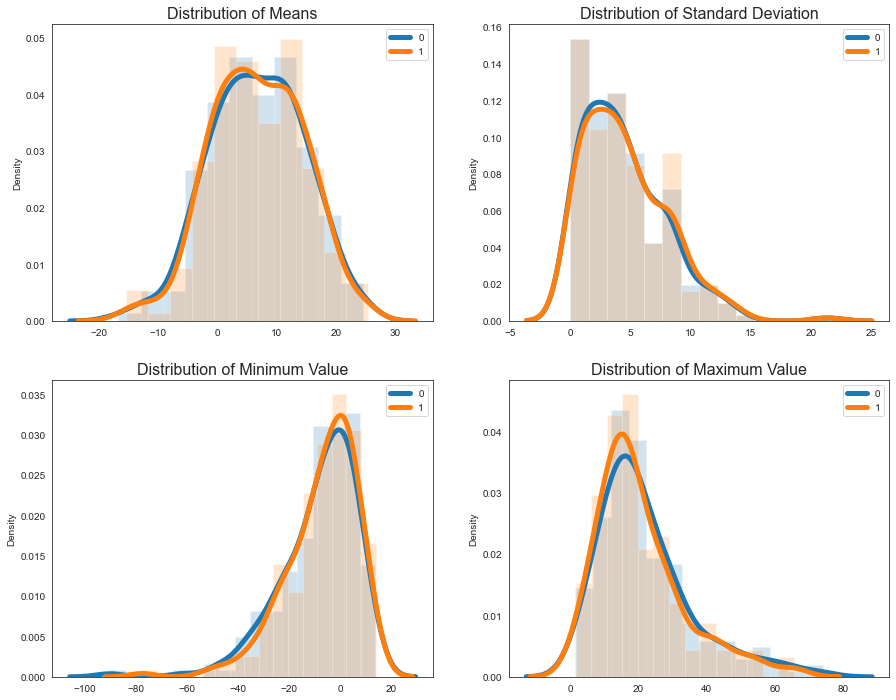

In [67]:
%%capture --no-display

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
distribution_plotter('', np.array(df.groupby('target').mean().T[0]))
distribution_plotter('Distribution of Means', np.array(df.groupby('target').mean().T[1]))
plt.legend(['0','1'])

plt.subplot(2, 2, 2)
distribution_plotter('', np.array(df.groupby('target').std().T[0]))
distribution_plotter('Distribution of Standard Deviation', np.array(df.groupby('target').std().T[1]))
plt.legend(['0','1'])

plt.subplot(2, 2, 3)
distribution_plotter('', np.array(df.groupby('target').min().T[0]))
distribution_plotter('Distribution of Minimum Value', np.array(df.groupby('target').min().T[1]))
plt.legend(['0','1'])

plt.subplot(2, 2, 4)
distribution_plotter('', np.array(df.groupby('target').max().T[0]))
distribution_plotter('Distribution of Maximum Value', np.array(df.groupby('target').max().T[1]))
plt.legend(['0','1'])

<ul style="font-size:20px">
    <li>The size of the range of statistical property values suggests that it might be interesting to <span style="color:red">scale the data </span>.</li>
    <li>Check whether there is statistical significance between the distributions as a function of the target value.</li>
    <li>Checking the distribution of variable values as a function of the target would allow <span style="color:red">identifying the most relevant variables for the problem</span>. Problem: number of variables.</li>
</ul>

### Correlation

In [11]:
df_corr = df.corr()

#### Heatmap

<AxesSubplot:>

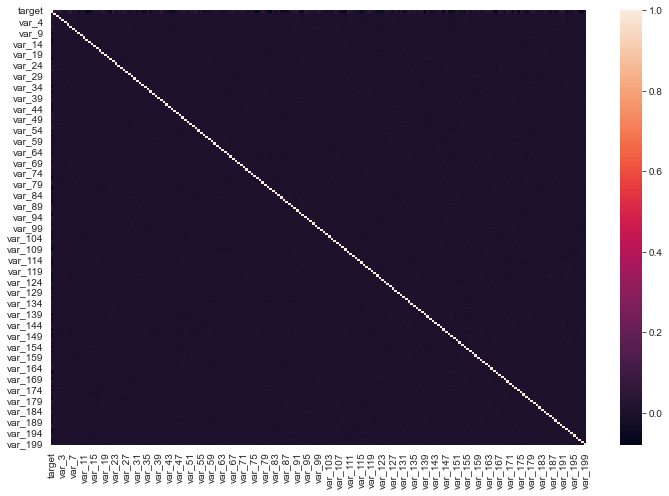

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr)

#### Correlation Table

<p style="font-size:15px;">
The correlations seem insignificant, but due to the amount of features it's hard to see clearly.
Let's look at the numerical data for more clarity on the relationships:
</p>

In [13]:
corr = df_corr.stack()
corr = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]
corr = pd.DataFrame(corr, columns = ['corr']).drop_duplicates()
corr = abs(corr).sort_values('corr', ascending = False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(corr)

corr
target  var_81   8.091733e-02
        var_139  7.407963e-02
        var_12   6.948928e-02
        var_6    6.673085e-02
        var_110  6.427530e-02
        var_146  6.364388e-02
        var_53   6.339861e-02
        var_26   6.242219e-02
        var_76   6.191747e-02
        var_174  6.166907e-02
        var_22   6.055842e-02
        var_21   5.848274e-02
        var_99   5.836702e-02
        var_166  5.777303e-02
        var_80   5.760948e-02
        var_190  5.597341e-02
        var_2    5.587035e-02
        var_165  5.573379e-02
        var_13   5.515628e-02
        var_148  5.501109e-02
        var_133  5.454762e-02
        var_198  5.299964e-02
        var_34   5.269211e-02
        var_0    5.238959e-02
        var_1    5.034263e-02
        var_115  5.017424e-02
        var_179  5.000177e-02
        var_109  4.992600e-02
        var_40   4.953026e-02
        var_44   4.903939e-02
        var_169  4.838218e-02
        var_184  4.831541e-02
        var_78   4.824466e-02
        var_170  4.797278e-02
        var_149  4.731908e-02
        var_191  4.711368e-02
        var_94   4.629577e-02
        var_92   4.629526e-02
        var_154  4.610604e-02
        var_108  4.479116e-02
        var_67   4.467337e-02
        var_33   4.433393e-02
        var_18   4.347904e-02
        var_192  4.285840e-02
        var_9    4.280550e-02
        var_122  4.246106e-02
        var_173  4.202224e-02
        var_164  4.099670e-02
        var_118  4.035785e-02
        var_123  4.029134e-02
        var_147  4.027953e-02
        var_91   4.012717e-02
        var_107  3.999698e-02
        var_121  3.978829e-02
        var_89   3.936862e-02
        var_86   3.912624e-02
        var_127  3.912488e-02
        var_95   3.853056e-02
        var_36   3.839659e-02
        var_75   3.808113e-02
        var_172  3.797647e-02
        var_155  3.723951e-02
        var_177  3.686307e-02
        var_35   3.656718e-02
        var_87   3.586020e-02
        var_197  3.530274e-02
        var_93   3.506999e-02
        var_56   3.499951e-02
        var_188  3.401458e-02
        var_71   3.360651e-02
        var_106  3.294690e-02
        var_162  3.264700e-02
        var_157  3.264248e-02
        var_131  3.238033e-02
        var_48   3.233439e-02
        var_163  3.181118e-02
        var_180  3.119043e-02
        var_5    3.097863e-02
        var_119  3.097509e-02
        var_145  3.091653e-02
        var_167  3.079676e-02
        var_49   3.061153e-02
        var_32   3.051330e-02
        var_186  3.042103e-02
        var_130  2.991733e-02
        var_141  2.970094e-02
        var_90   2.939546e-02
        var_43   2.855663e-02
        var_24   2.847742e-02
        var_195  2.828454e-02
        var_125  2.822278e-02
        var_135  2.794426e-02
        var_52   2.775359e-02
        var_151  2.752447e-02
        var_137  2.718969e-02
        var_128  2.690899e-02
        var_70   2.674768e-02
        var_111  2.668598e-02
        var_104  2.660533e-02
        var_114  2.626621e-02
        var_51   2.599245e-02
        var_150  2.582110e-02
        var_31   2.561868e-02
        var_105  2.560392e-02
        var_23   2.547310e-02
        var_199  2.543448e-02
        var_85   2.451272e-02
        var_132  2.451032e-02
        var_58   2.427664e-02
        var_28   2.394225e-02
        var_112  2.369400e-02
        var_196  2.360780e-02
        var_116  2.344771e-02
        var_66   2.311432e-02
        var_11   2.299321e-02
        var_194  2.283766e-02
        var_82   2.257406e-02
        var_175  2.169164e-02
        var_144  2.120786e-02
        var_156  2.099728e-02
        var_88   2.067740e-02
        var_83   2.052799e-02
        var_45   2.006515e-02
        var_74   1.992576e-02
        var_178  1.968148e-02
        var_8    1.958427e-02
        var_142  1.890064e-02
        var_102  1.832925e-02
        var_20   1.832899e-02
        var_138  1.832831e-02
        var_193  1.770937e-02
        var_77   1.745852e-02
        var_15   1.728256e-02
     

<ul style="font-size:20px;">
  <li>The first 161 highest observed correlation values are for the variable target with some feature. Could it be a first indication of what are the most important features in the data?</li>
  <li>The highest correlation value (absolute) is extremely low: 0.081</li>
  <li>CHECK: Although there are no large linear correlations, there may be <span style="color:red">correlations of another type</span>.</li>
  <li>Remember that the separation of possible categorical variables has not yet been done.</li>
</ul>

# Feature Enginnering

## Separation between target variable and explanatory variables

In [14]:
X = df.drop(['target'], axis=1)
X.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [15]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [16]:
y.value_counts()

0    179902
1     20098
Name: target, dtype: int64

<p style="font-size:15px;">
As noted above, the relationship between the data of the target variable is highly disproportionate (~11/100), making it necessary to use techniques to circumvent the unbalance when training the models.
</p>

### Separation between train and test data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
print('Verification of the proportion of data in the target variable:')
print('TRAIN:')
print(y_train.value_counts(normalize=True));
print('TEST:')
print(y_test.value_counts(normalize=True));

Verification of the proportion of data in the target variable:
TRAIN:
0    0.900329
1    0.099671
Name: target, dtype: float64
TEST:
0    0.8976
1    0.1024
Name: target, dtype: float64


## Data Scaling

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [70]:
standardScaler = StandardScaler()
minMaxScaler = MinMaxScaler()
robustScaler = RobustScaler()

As discussed, it is possible that some of the features present in the dataset behave as categorical variables, despite having numerical values.

One way to determine which variables would have this behavior is to consider the percentage of unique values for each feature and determine a threshold beyond which a variable will be considered categorical or not.The lack of knowledge about the meaning of dataset variables makes it difficult to determine this threshold in any way other than iteratively.

So, initially, we will scale all the features (considering all numeric), this way, this step of the process will not need to be revised later, while it will not prevent the subsequent encoding of the features determined by the threshold.

In [26]:
standardScaler.fit(X_train); #std = 1
minMaxScaler.fit(X_train); #range: [0 to 1]
robustScaler.fit(X_train); #reduce the effects of outliers

In [27]:
X_train_stand = standardScaler.transform(X_train)
X_train_minMax = minMaxScaler.transform(X_train)
X_train_robust = robustScaler.transform(X_train)

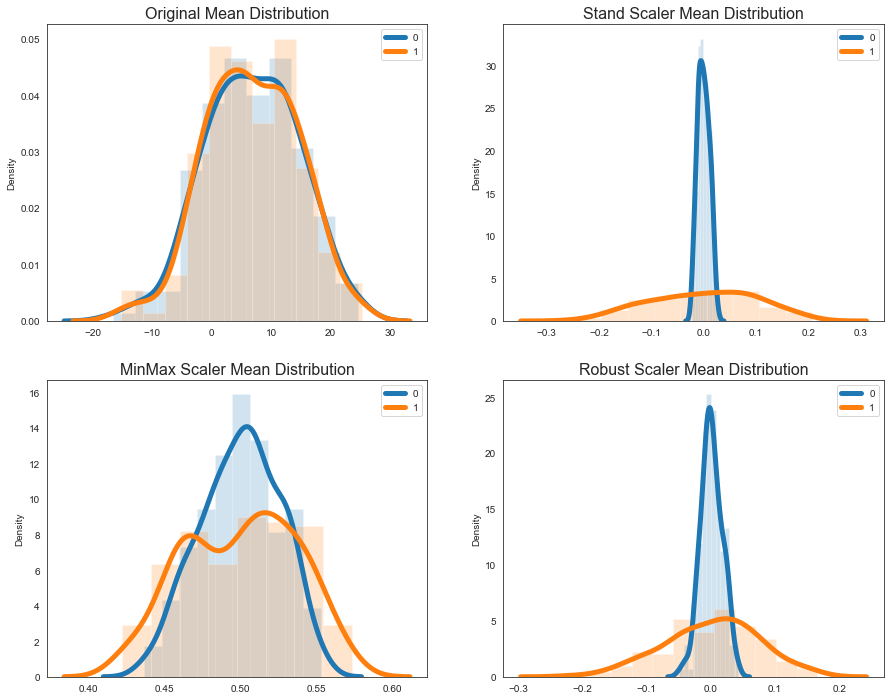

In [68]:
%%capture --no-display

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
distribution_plotter('', X_train[y_train == 0].mean())
distribution_plotter('Original Mean Distribution', X_train[y_train == 1].mean())
plt.legend(['0','1'])

plt.subplot(2, 2, 2)
distribution_plotter('', np.mean(X_train_stand[y_train == 0], axis=0))
distribution_plotter('Stand Scaler Mean Distribution', np.mean(X_train_stand[y_train == 1], axis=0))
plt.legend(['0','1'])

plt.subplot(2, 2, 3)
distribution_plotter('', np.mean(X_train_minMax[y_train == 0], axis=0))
distribution_plotter('MinMax Scaler Mean Distribution', np.mean(X_train_minMax[y_train == 1], axis=0))
plt.legend(['0','1'])

plt.subplot(2, 2, 4)
distribution_plotter('', np.mean(X_train_robust[y_train == 0], axis=0))
distribution_plotter('Robust Scaler Mean Distribution', np.mean(X_train_robust[y_train == 1], axis=0))
plt.legend(['0','1'])

<p style="font-size:20px; color:red">Do the results make sense? Are it as expected?</p>

## Encoding

<a href=#threshold_cell>[Categorical variables]</a>

In [ ]:
# Encoding
# Frequency Encoding
# Mean Encoding/Smoothing
# https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

<img src="img/work-in-progress.png">

In [ ]:
#DIMENSIONAL REDUCTION

In [ ]:
#OUTLIERS IDENTIFICATION

In [ ]:
#ALGORITHM TRAINING

In [ ]:
#OPTIMIZATION OF THE SELECTED MODEL